# Tutorial on the usage of contacts

This tutorial will show how to use the contacts class to compute the intermolecular contacts between polymers that belong to the largest micelle of the system.

Before starting any analysis, load the neccesary modules for this class.

In [1]:
from  utils_mda import MDA_input
#from pysoftk.pol_analysis.tools.utils_mda import MDA_input
from utils_tools import *
#from pysoftk.pol_analysis.tools.utils_tools import *
from clustering import SCP
#from pysoftk.pol_analysis.clustering import SCP
from make_micelle_whole import micelle_whole
#from pysoftk.pol_analysis.make_micelle_whole import micelle_whole
from contact_analysis import contacts
#from pysoftk.pol_analysis.contact_analysis import contactsn

import numpy as np
import pandas as pd

/home/raquellrdc/Desktop/PhD/mda_umap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. First load the trajectory, we are going to use the cyclic topology used in previous tutorials.

In [2]:
topology='data/short_movie_cyclic.tpr'
trajectory='data/short_movie_cyclic.xtc'


2. Import the clustering data from SCP function, to obtain the resids of the polymers of each micelle

In [3]:
resids_total='data/pictures_tutorial/cyclic_scp_result.parquet'

3. Obtain the largest micelle from the clustering pandas dataframe

In [4]:
largest_micelle_resids = micelle_whole(topology, trajectory).obtain_largest_micelle_resids(resids_total)

4. Now, obtain the positions of the whole micelle

In [5]:
#select the resname of the polymers
resname=['LIG']

#run to obtain the whole positions
start=0
stop=10001
step=1

#run micelle_whole
atom_pos = micelle_whole(topology, trajectory).running_make_cluster_whole(resname, largest_micelle_resids, start, stop, step)

  0%|                                                                                                                                                    | 0/3 [00:00<?, ?it/s]/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/make_micelle_whole.py:347: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  atom_positions_over_trajectory = list(tqdm(map(self.make_cluster_whole, frames, resname, cluster_resids_f[0],
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.23it/s]

Elapsed time for matrix calculation: 0.3993 seconds


5. Let's select the atoms for the intemolecular contact calculation and the cutoff distance

In [6]:
#atoms for the calculation
MA_names = ['C027',  'C023',  'C021',  'C02H',  'C02L',  'C02P',  'C02T', 'C02X', 'C00U',  'C00R',  'C00P', 'C00L']

#cutoff distance-this can be obtained from radial distribution functions or just by intuition

cutoff=10

6. We have all the neccesary inputs to run the contacts calculation

In [7]:
contacts_matrix = contacts(topology, trajectory).run_contacts_calc(largest_micelle_resids, atom_pos,
                                                                       MA_names,MA_names, 10)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.07it/s]


The array 'contacts_matrix' contains the intermolecular contacts between MA_names and MA_names over all polymers and over all time steps. The output is given like this for users to be able to play with the data and work with the output in the way they want. However, to report the average over the polymers, it is neccesary to divide all values by the number of polymers in the micelle. And then the mean over the time steps to get the average value over the trajectory.

In [10]:
#to normalize the contacts depending on number of polymers in the micelle in each time step

contacts_normalized=[]

for i in range(len(largest_micelle_resids)):
    
    len_micelle=len(largest_micelle_resids[i]) #number of polymers in the micelle at a specific time step
    
    contacts_normalized.append((np.array(contacts_matrix[i])/len_micelle)) #each contact value is divided by the number of polymers in the micelle
    
contacts_normalized = np.array(contacts_normalized) #array with the contacts values normalized over polymer number


In [11]:
#average over time

mean_contacts=np.mean(contacts_normalized, axis=0)

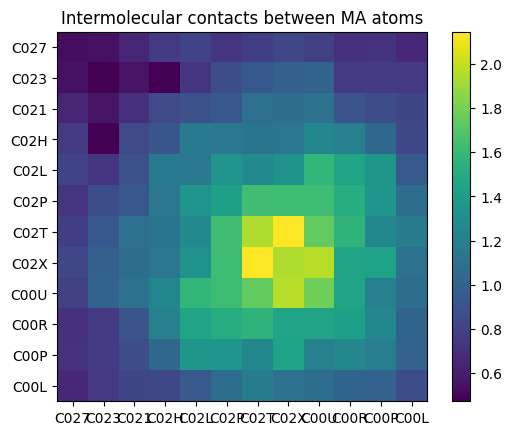

In [12]:
import matplotlib.pyplot as plt

plt.imshow(mean_contacts, cmap='viridis')  # You can choose a different colormap (e.g., 'coolwarm', 'hot', 'jet', etc.)
plt.colorbar()  # Add a colorbar to the heatmap
plt.xticks(np.arange(len(MA_names)), MA_names)
plt.yticks(np.arange(len(MA_names)), MA_names)
plt.title('Intermolecular contacts between MA atoms')
plt.show()

This heatmap is a clear way to represent the contacts that each atom has with all the other atoms of the other group. In this case we calculated the contacts between atoms belonging to the MA names, but you can also calculate the contacts between atoms of different groups. It is as easy as feeding in two different groups of atom names to the contacts function